In [ ]:
# Import libraries and customers file.
# Check stats, clean and rename columns to be consistent with the other data frame.
# Check for mixed types and duplicates. 
# Import ords prods file.
# Merge customer file with orders and products file.
# Map state to region again since unsuccessful in file. 
# Create visualizations. Used for final report. 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Instacart Basket Analysis\02 Data\Original data'

In [3]:
# import customers df
cust = pd.read_csv(os.path.join(path, 'customers.csv'))

In [4]:
# Displaying the columns. 
cust.head(5)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [5]:
# Drop the first and last name columns, since these are not relevant for this analysis (GDPR reasons as well maybe?). 
cust.drop(columns = ['First Name', 'Surnam'])

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...
206204,168073,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Female,California,27,4/1/2020,1,married,99799


In [6]:
# Actually dropping the columns and creating a new "copy" called custs not to alterate the original file
custs = cust.drop(columns = ['First Name', 'Surnam'])

In [7]:
# Check if columns dropped
custs.head(5)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


In [8]:
# Checking if missing values in the user id (key field) column, since this is probably the column that I will merge both files with. All entries are there though, 206209.
custs['user_id'].value_counts(dropna = False)

user_id
26711     1
67322     1
173044    1
61044     1
98344     1
         ..
146847    1
154991    1
172193    1
184326    1
80148     1
Name: count, Length: 206209, dtype: int64

In [9]:
# Checking if missing values in the income column. It seems like there are missing values, 108012 entries (compared with 206209).
custs['income'].value_counts(dropna = False)

income
57192     10
95891     10
95710     10
97532      9
98675      9
          ..
73141      1
71524      1
74408      1
44780      1
148828     1
Name: count, Length: 108012, dtype: int64

In [10]:
# Rename gender column. Remove capital letters and keep all small.  
custs.rename(columns = {'Gender' : 'gender'}, inplace = True)

In [11]:
# Rename state column 
custs.rename(columns = {'STATE' : 'state'}, inplace = True)

In [12]:
# Rename age column 
custs.rename(columns = {'Age' : 'age'}, inplace = True)

In [13]:
# Check the statistics of the dataframe custs. It seems like all entries are there, also in the income column. Compare with above. 
custs.describe()

,user_id,age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [14]:
# Check for mixed types. There do not seem to be any since nothing is printed.
for col in custs.columns:
    types = custs[col].map(type)
    if len(types.unique()) > 1:
        print(f"Column '{col}' has mixed types:")
        print(types.value_counts())
        print(custs.loc[types != types.iloc[0], col])


In [15]:
# Looking for null values. No missing values can be found here. 
custs.isnull().sum()

user_id         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

In [16]:
# Check the shape of the file. 206209 rows, 8 columns. Good to use if I actually alter data, but here there were no missing values, nothing to drop etc.
custs.shape

(206209, 8)

In [17]:
# Look for full duplicates.
custs_dups = custs[custs.duplicated()]

In [18]:
# Check if there were any duplicates. There were none.
custs_dups

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income


In [19]:
custs.shape

(206209, 8)

In [20]:
# define path for importing another file
path = r'C:\Users\Administrator\Documents\data analytics\Instacart Basket Analysis\02 Data\Prepared data'

In [21]:
# import ords_prods_merge
ords_prods = pd.read_pickle(os.path.join(path, 'ords_prods_newest.pkl'))

In [22]:
# Check the shape, rows, columns.
ords_prods.shape

(32641268, 24)

In [23]:
# Check the output
ords_prods.head(2)


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,validation,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest day,busiest_hour,max_order,average_price,spending_flag,loyalty_flag,avg_price,frequency_flag
0,2539329,1,1,2,8,NaN,prior,196.0,1.0,0.0,...,9.0,Mid-range product,Regularly busy,Most orders,11,6.367797,High spender,Low spender,5.9,NaN
1,2539329,1,1,2,8,NaN,prior,14084.0,2.0,0.0,...,12.5,Mid-range product,Regularly busy,Most orders,11,6.367797,High spender,Low spender,5.9,NaN


In [24]:
custs.shape

(206209, 8)

In [25]:
# Merge custs with ords_prods_merge
ords_prods_custs = ords_prods.merge(custs, on = 'user_id', indicator = False)

In [26]:
# Check if it was merged
ords_prods_custs.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,validation,product_id,add_to_cart_order,reordered,...,loyalty_flag,avg_price,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,prior,196.0,1.0,0.0,...,Low spender,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,prior,14084.0,2.0,0.0,...,Low spender,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423


In [27]:
ords_prods_custs.shape

(32641268, 31)

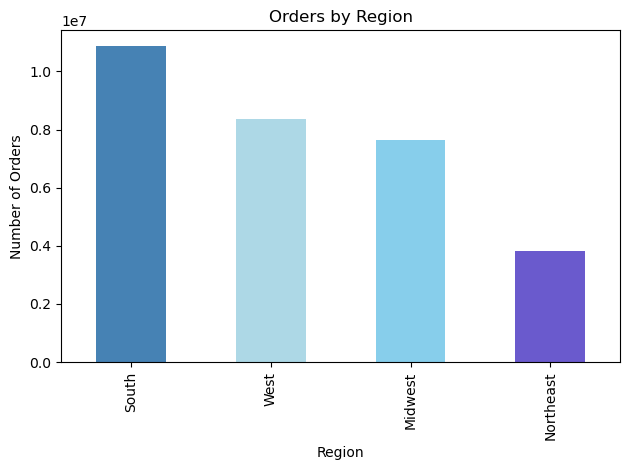

In [36]:
state_to_region = {
    # Northeast
    'Connecticut': 'Northeast', 'Massachusetts': 'Northeast', 'Maine': 'Northeast', 'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 

    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest', 'Wisconsin': 'Midwest',
    'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

    # South
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South', 'Alabama': 'South',
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South',

    # West
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West',
    'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West', 'California': 'West',
    'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
    }
# Map each row to a region
ords_prods_custs['region'] = ords_prods_custs['state'].map(state_to_region)

region_orders = ords_prods_custs.groupby('region').size().sort_values(ascending=False)

# Creation of histogram 
region_orders.plot(kind='bar', color=['steelblue', 'lightblue', 'skyblue', 'slateblue'])
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Orders by Region')
plt.tight_layout()
plt.savefig("/Users/Administrator/Documents/data analytics/Instacart Basket Analysis/04 Analysis/Vizualizations/orders by region_plot.png") # save figure
plt.show()



In [29]:
path

'C:\\Users\\Administrator\\Documents\\data analytics\\Instacart Basket Analysis\\02 Data\\Prepared data'

In [30]:
# Export data to .pickle 
ords_prods_custs.to_pickle(os.path.join(path, 'ords_prods_custs.pkl'))

In [41]:
top5_products = ords_prods_custs['product_name'].value_counts().head(5).index.tolist() # Find the top 5 products

In [42]:
top_products_df = ords_prods_custs[ords_prods_custs['product_name'].isin(top5_products)] # Filter to only use the data set with top 5 products

In [43]:
grouped = top_products_df.groupby(['region', 'product_name']).size().unstack(fill_value=0) # Group by region and product name

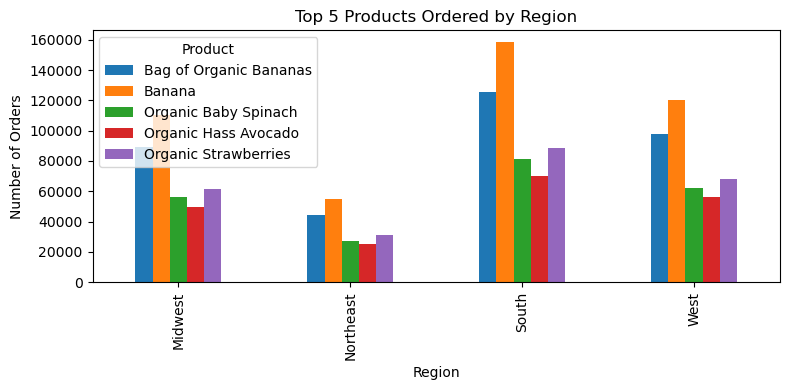

In [44]:
grouped.plot(kind='bar', figsize=(8,4))
plt.title('Top 5 Products Ordered by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.legend(title='Product')
plt.tight_layout()
plt.savefig("/Users/Administrator/Documents/data analytics/Instacart Basket Analysis/04 Analysis/Vizualizations/top 5 prods by region_plot.png") # save figure
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3924\3558282516.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = top_products_df.groupby(['region', 'age_group']).size().unstack(fill_value=0) # Group by region and product name


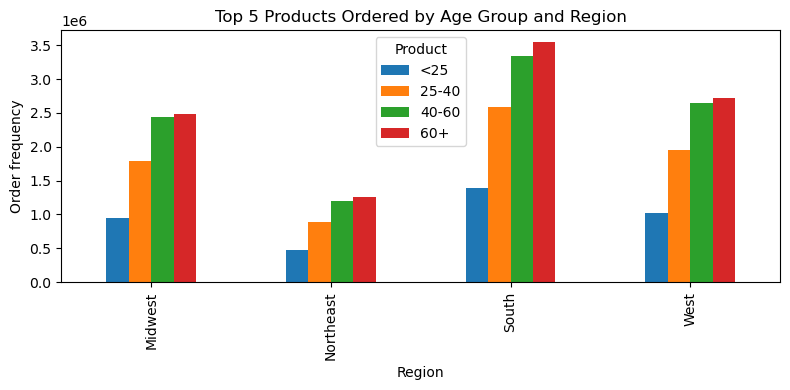

In [38]:
# Extending above table to include age groups as well
ords_prods_custs['age_group'] = pd.cut(ords_prods_custs['age'], bins=[0, 25, 40, 60, 100],
                          labels=['<25', '25-40', '40-60', '60+']) # Creation of bins for age

top5_products = ords_prods_custs['age_group'].value_counts().head(5).index.tolist() # Find the top 5 products
top_products_df = ords_prods_custs[ords_prods_custs['age_group'].isin(top5_products)] # Filter to only use the data set with top 5 products
grouped = top_products_df.groupby(['region', 'age_group']).size().unstack(fill_value=0) # Group by region and product name

grouped.plot(kind='bar', figsize=(8,4))
plt.title('Top 5 Products Ordered by Age Group and Region')
plt.xlabel('Region')
plt.ylabel('Order frequency')
plt.legend(title='Product')
plt.tight_layout()
plt.show()


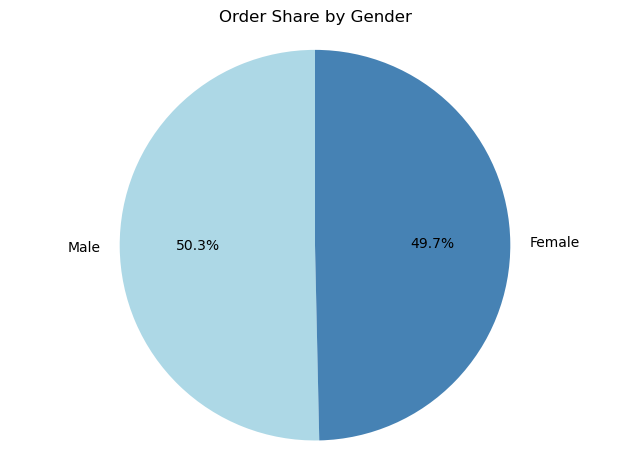

In [86]:
ords_prods_custs['gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'steelblue'],
    ylabel=''
)
plt.title('Order Share by Gender')
plt.tight_layout()
plt.axis('equal')  # Keep it circular
plt.show()

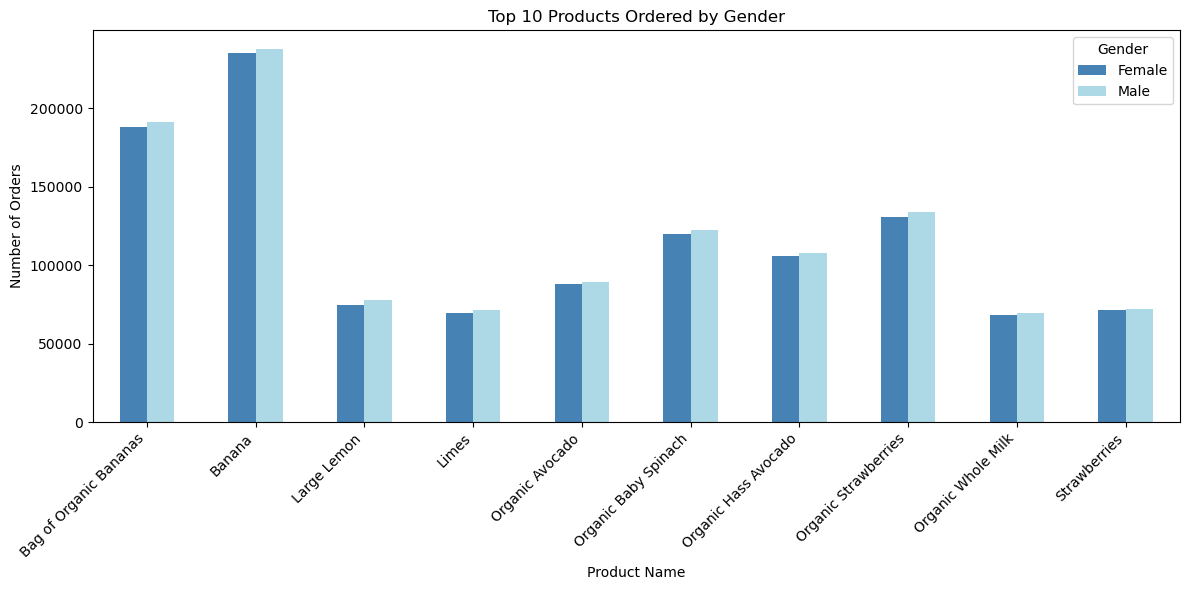

In [96]:
# Step 1: Get top 10 product names
top10_products = ords_prods_custs['product_name'].value_counts().head(10).index.tolist()

# Step 2: Filter the DataFrame to only top 10 products
top_df = ords_prods_custs[ords_prods_custs['product_name'].isin(top10_products)]

# Step 3: Group and count orders by product and gender
grouped = top_df.groupby(['product_name', 'gender']).size().unstack(fill_value=0)

# Step 4: Plot the result
grouped.plot(kind='bar', figsize=(12,6), color=['steelblue', 'lightblue'])
plt.title('Top 10 Products Ordered by Gender')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()